In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import sympy as sym
import random as rand
import Data
import Functions_module_beta as fn
from Functions_module_beta import MatrixAction, SystemAction
import custom_functions_01 as cfn

In [11]:
theta_list = np.linspace(45,0,19)
# print(theta_list)
splitters_choice = Data.big_phi_abstract[1405]
third_detector_outs = [cfn.Four_list(splitters_choice, theta = i, compared = True) for i in theta_list]
confidence_list = [cfn.Confidence(i, port=3, state_number= 3) for i in third_detector_outs]
# confidence_list = [((i[2][2])**2/(sum([j**2 for j in i[2]]))) for i in third_detector_outs]    # alternate, direct way
# confidence_list

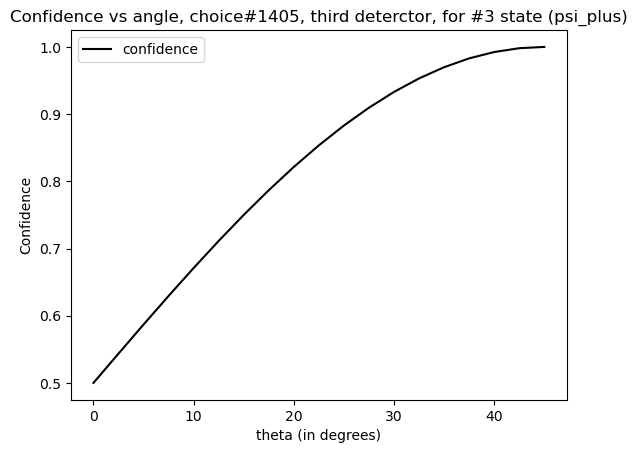

In [12]:
# plt.plot(theta_list, np.sin((theta_list)*np.pi/180),'--g', label = "sine")
# plt.plot(theta_list, (np.sin(theta_list*np.pi/180))**2,'-.y', label = "sine_squared")
plt.plot(theta_list,confidence_list, '-k', label = "confidence")
plt.title('Confidence vs angle, choice#1405, third deterctor, for #3 state (psi_plus)')
plt.ylabel('Confidence')
plt.xlabel('theta (in degrees)')
plt.legend();

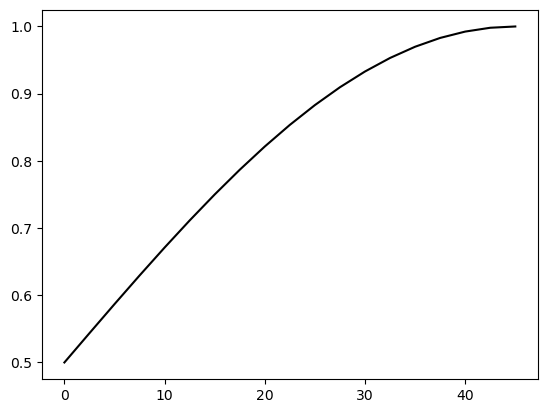

In [13]:
theta_list = np.linspace(45,0,19)
splitters_choice_729 = Data.big_phi_abstract_729[401] 
third_detector_outs = [cfn.Four_list(splitters_choice, theta = i, compared = True) for i in theta_list]
# print(third_detector_outs[0])
# print(third_detector_outs[5])
confidence_list = [cfn.Confidence(i, port=2, state_number= 4) for i in third_detector_outs]
plt.plot(theta_list,confidence_list, '-k', label = "confidence_second_port_1stOut");

In [10]:
# Creating the lists, later will plot
x_list = np.array(list(range(len(Data.big_phi_abstract))))
print(fn.TenStateBasis)           # see that we need the second, third, fourth, fifth elts coz they correspond to 00, 01, 10, 11 states (when angle is set to zero in bell like states)
# check confidence just for 00 state dectors ie the second one in the tenstate basis list
third_detector_outs = [cfn.Four_list(splitters_choice[i], theta = 0, compared = True) for i in x_list]
confidence_list = [cfn.Confidence(i, port=3, state_number= 3) for i in third_detector_outs]



[[1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1], [2, 0, 0, 0], [0, 2, 0, 0], [0, 0, 2, 0], [0, 0, 0, 2]]


NameError: name 'splitters_choice' is not defined

In [14]:
cfn.Four_list(splitters_choice, compared=True, theta = 40)

[[0.0, 0.0, -0.043577, -0.498097],
 [0.0, 0.0, 0.043577, 0.498097],
 [0.0, 0.0, -0.704416, 0.061628],
 [0.061628, 0.704416, 0.0, 0.0],
 [0.0, 0.0, -0.043577, -0.498097],
 [0.0, 0.0, -0.043577, -0.498097],
 [0.454519, -0.541675, 0.0, 0.0],
 [-0.498097, 0.043577, -0.498097, 0.043577],
 [-0.498097, 0.043577, 0.498097, -0.043577],
 [0.541675, 0.454519, 0.0, 0.0]]

In [6]:
theta_points = np.arange(45,-1,-5)

array([45, 40, 35, 30, 25, 20, 15, 10,  5,  0])

In [40]:
theta_list = np.linspace(45,0,19)


fig = plt.figure()

def animated_plots(i): # i is the ith elt of the big splitter list
    splitter_choice = Data.big_phi_abstract[i]
    confidence_list = [cfn.Confidence(cfn.Four_list(splitter_choice, theta = j, compared= True), port= 3, state_number= 3) for j in theta_list]
    plt.plot(theta_list, confidence_list)

# fig = plt.figure()
# animator = ani.FuncAnimation(fig, chartfunc, interval = 100)

movie = ani.FuncAnimation(fig, animated_plots, interval = 20)
# movie

AttributeError: 'FuncAnimation' object has no attribute 'FuncAnimation'

<Figure size 640x480 with 0 Axes>

In [18]:
def avg_prob_with_confidence(confidence = 1, index_15k = False, index_729 = False ,theta = 45, four_list_compared = False, machine_uncertainty = .001,  priors = [.25,.25,.25,.25]):     
# index_15k is a ith elt of list big_phi_abstract, index_729 for big_phi_abstract_729, machine_uncertainty is to account for error in numerical computations 
    if priors != [.25,.25,.25,.25]:
        if sum(priors) != 1:
            print('YO! Priors dont add to 1!! \n \n ') 
    if index_15k != False:
        splitters = Data.big_phi_abstract[index_15k]
        four_list_compared = cfn.Four_list(splitters, compared= True, theta = theta)
    elif index_729 != False:
        splitters = Data.big_phi_abstract_729[index_729]
        four_list_compared = cfn.Four_list(splitters, compared= True, theta = theta)
#     print(four_list_compared)
    c_threshold = confidence-machine_uncertainty
    avg_prob_at_confidence = 0
    # i index for states - 0,1,2,3, j index for detectors - 0,1,2,...,9
    # detector j click prob = sum_i ( eta_i*a_(ij)^2) .. Ex [.5,0,.5,0] will give .25*.5^2+.25*.5^2
    detector_prob_list = []             # creating list of the ten detector prob - denoted p_i in the theory work
    for j in range(10):
        detector_prob = sum([priors[i]*(four_list_compared[j][i])**2 for i in range(4)])
        if detector_prob == 0:
            detector_prob_list.append(1)
        else:
            detector_prob_list.append(detector_prob)
    for i in range(4):
        sum_cij_pj = 0
        for j in range(10):
            c_ij = (priors[i]*(four_list_compared[j][i])**2/detector_prob_list[j]) 
            if c_ij >= c_threshold:
                sum_cij_pj += c_ij*detector_prob_list[j]
        avg_prob_at_confidence += sum_cij_pj       
    return avg_prob_at_confidence
    # avg_prob_with_confidence(index_15k=1405)
    
avg_prob_with_confidence(index_729= 200, theta = 40, confidence = .97)



0.49620190105600004

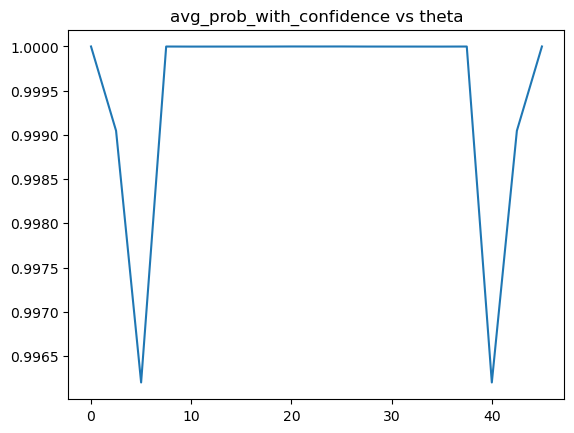

In [47]:
confidence_y = [avg_prob_with_confidence(index_729=200, theta= i , confidence = 0.01) for i in theta_list]
plt.title(f'avg_prob_with_confidence vs theta')
plt.plot(theta_list, confidence_y)

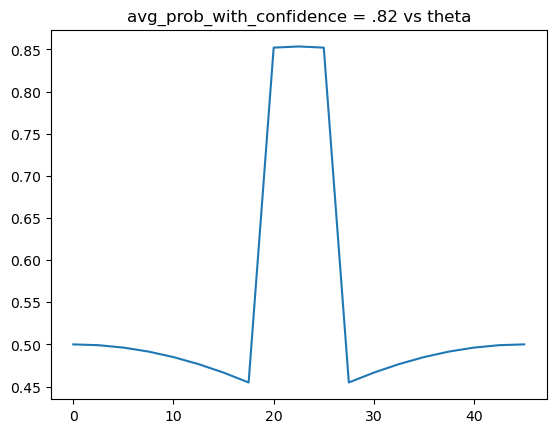

In [33]:
confidence_y = [avg_prob_with_confidence(index_729=200, theta= i , confidence = .82) for i in theta_list]
plt.title('avg_prob_with_confidence = .82 vs theta')
plt.plot(theta_list, confidence_y)

In [25]:
print(cfn.Four_list(Data.big_phi_abstract_729[200], theta= 30, compared= True))
print(cfn.Four_list(Data.big_phi_abstract_729[200], theta= 28, compared= True))
print(cfn.Four_list(Data.big_phi_abstract_729[200], theta= 26, compared= True))
print(cfn.Four_list(Data.big_phi_abstract_729[200], theta= 24, compared= True))
print(cfn.Four_list(Data.big_phi_abstract_729[200], theta= 20, compared= True))
print(cfn.Four_list(Data.big_phi_abstract_729[200], theta= 15, compared= True))

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.683012, -0.183012], [0.0, 0.0, 0.183012, 0.683012], [0.0, 0.0, 0.183012, 0.683012], [0.0, 0.0, 0.683012, -0.183012], [0.0, 0.0, 0.0, 0.0], [0.353553, -0.612372, 0.0, 0.0], [-0.353553, 0.612372, 0.0, 0.0], [0.612372, 0.353553, 0.0, 0.0], [-0.612372, -0.353553, 0.0, 0.0]]
[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.676209, -0.206738], [0.0, 0.0, 0.206738, 0.676209], [0.0, 0.0, 0.206738, 0.676209], [0.0, 0.0, 0.676209, -0.206738], [0.0, 0.0, 0.0, 0.0], [0.331966, -0.624338, 0.0, 0.0], [-0.331966, 0.624338, 0.0, 0.0], [0.624338, 0.331966, 0.0, 0.0], [-0.624338, -0.331966, 0.0, 0.0]]
[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.668582, -0.230211], [0.0, 0.0, 0.230211, 0.668582], [0.0, 0.0, 0.230211, 0.668582], [0.0, 0.0, 0.668582, -0.230211], [0.0, 0.0, 0.0, 0.0], [0.309975, -0.635543, 0.0, 0.0], [-0.309975, 0.635543, 0.0, 0.0], [0.635543, 0.309975, 0.0, 0.0], [-0.635543, -0.309975, 0.0, 0.0]]
[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.660141, -0.253404], [0.0, 0.0, 0.253404, 0.

In [27]:
print(avg_prob_with_confidence(four_list_compared= [[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.660141, -0.253404], [0.0, 0.0, 0.253404, 0.660141], [0.0, 0.0, 0.253404, 0.660141], [0.0, 0.0, 0.660141, -0.253404], [0.0, 0.0, 0.0, 0.0], [0.287606, -0.645974, 0.0, 0.0], [-0.287606, 0.645974, 0.0, 0.0], [0.645974, 0.287606, 0.0, 0.0], [-0.645974, -0.287606, 0.0, 0.0]], confidence = .82 ))

0.853068548557


In [32]:
def avg_prob_with_confidence_temp(confidence = 1, index_15k = False, index_729 = False ,theta = 45, four_list_compared = False, machine_uncertainty = .001,  priors = [.25,.25,.25,.25]):     
# index_15k is a ith elt of list big_phi_abstract, index_729 for big_phi_abstract_729, machine_uncertainty is to account for error in numerical computations 
    if priors != [.25,.25,.25,.25]:
        if sum(priors) != 1:
            print('YO! Priors dont add to 1!! \n \n ') 
    if index_15k != False:
        splitters = Data.big_phi_abstract[index_15k]
        four_list_compared = cfn.Four_list(splitters, compared= True, theta = theta)
    elif index_729 != False:
        splitters = Data.big_phi_abstract_729[index_729]
        four_list_compared = cfn.Four_list(splitters, compared= True, theta = theta)
    print(four_list_compared)
    c_threshold = confidence-machine_uncertainty
    avg_prob_at_confidence = 0
    # i index for states - 0,1,2,3, j index for detectors - 0,1,2,...,9
    # detector j click prob = sum_i ( eta_i*a_(ij)^2) .. Ex [.5,0,.5,0] will give .25*.5^2+.25*.5^2
    detector_prob_list = []             # creating list of the ten detector prob - denoted p_i in the theory work
    
    for j in range(10):
        detector_prob = sum([priors[i]*(four_list_compared[j][i])**2 for i in range(4)])
        if detector_prob == 0:
            detector_prob_list.append(1)
        else:
            detector_prob_list.append(detector_prob)
    print('detector probs:',detector_prob_list)
    for i in range(4):
        sum_cij_pj = 0
        for j in range(10):
            c_ij = (priors[i]*(four_list_compared[j][i])**2/detector_prob_list[j])
            print('c_ij : ', c_ij)
            if c_ij >= c_threshold:
                sum_cij_pj += c_ij*detector_prob_list[j]
        avg_prob_at_confidence += sum_cij_pj
        print('avg_prob_at_confidence:',avg_prob_at_confidence, '\n')
    return avg_prob_at_confidence
    # avg_prob_with_confidence(index_15k=1405)
    
avg_prob_with_confidence_temp(index_729=200, theta= 30 , confidence = .82)
avg_prob_with_confidence_temp(index_729=200, theta= 24 , confidence = .82)

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.683012, -0.183012], [0.0, 0.0, 0.183012, 0.683012], [0.0, 0.0, 0.183012, 0.683012], [0.0, 0.0, 0.683012, -0.183012], [0.0, 0.0, 0.0, 0.0], [0.353553, -0.612372, 0.0, 0.0], [-0.353553, 0.612372, 0.0, 0.0], [0.612372, 0.353553, 0.0, 0.0], [-0.612372, -0.353553, 0.0, 0.0]]
detector probs: [1, 0.12499969607199998, 0.12499969607199998, 0.12499969607199998, 0.12499969607199998, 1, 0.12499979754825001, 0.12499979754825001, 0.12499979754825001, 0.12499979754825001]
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.2499998525212611
c_ij :  0.2499998525212611
c_ij :  0.7500001474787389
c_ij :  0.7500001474787389
avg_prob_at_confidence: 0 

c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.7500001474787389
c_ij :  0.7500001474787389
c_ij :  0.2499998525212611
c_ij :  0.2499998525212611
avg_prob_at_confidence: 0 

c_ij :  0.0
c_ij :  0.933013052838329
c_ij :  0.06698694716167103
c_ij :  0.0669869471

0.853068548557

In [50]:
avg_prob_with_confidence_temp(index_729=200, theta= 4 , confidence = .01)

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.53366, -0.463903], [0.0, 0.0, 0.463903, 0.53366], [0.0, 0.0, 0.463903, 0.53366], [0.0, 0.0, 0.53366, -0.463903], [0.0, 0.0, 0.0, 0.0], [0.049325, -0.705384, 0.0, 0.0], [-0.049325, 0.705384, 0.0, 0.0], [0.705384, 0.049325, 0.0, 0.0], [-0.705384, -0.049325, 0.0, 0.0]]
detector probs: [1, 0.12499974725225002, 0.12499974725225002, 0.12499974725225002, 0.12499974725225002, 1, 0.12499988577025001, 0.12499988577025001, 0.12499988577025001, 0.12499988577025001]
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.004865915696658668
c_ij :  0.004865915696658668
c_ij :  0.9951340843033413
c_ij :  0.9951340843033413
avg_prob_at_confidence: 0.248783293728 

c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.0
c_ij :  0.9951340843033413
c_ij :  0.9951340843033413
c_ij :  0.004865915696658668
c_ij :  0.004865915696658668
avg_prob_at_confidence: 0.497566587456 

c_ij :  0.0
c_ij :  0.5695871428949504
c_ij :  0.4304128

0.9975655764650002